# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal: 

### Gain insights into similarity between countries and regions of the world by experimenting with K-Means Clustering
----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Perform Exploratory Data Analysis

In [9]:
data = pd.read_csv('../cia_factbook.csv')
df = data

df

,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03
1,Canada,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76
2,United States,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77
3,China,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44
4,Brazil,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80
...,...,...,...,...,...,...,...,...,...,...,...
254,Bouvet Island,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,Palmyra Atoll,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Akrotiri,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,European Union,NaN,NaN,NaN,4.33,NaN,80.02,NaN,NaN,5.114348e+08,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  259 non-null    object 
 1   area                     257 non-null    float64
 2   birth_rate               224 non-null    float64
 3   death_rate               225 non-null    float64
 4   infant_mortality_rate    224 non-null    float64
 5   internet_users           213 non-null    float64
 6   life_exp_at_birth        224 non-null    float64
 7   maternal_mortality_rate  184 non-null    float64
 8   net_migration_rate       222 non-null    float64
 9   population               238 non-null    float64
 10  population_growth_rate   233 non-null    float64
dtypes: float64(10), object(1)
memory usage: 22.4+ KB


In [11]:
df.isna().sum()

country                     0
area                        2
birth_rate                 35
death_rate                 34
infant_mortality_rate      35
internet_users             46
life_exp_at_birth          35
maternal_mortality_rate    75
net_migration_rate         37
population                 21
population_growth_rate     26
dtype: int64

In [12]:
df.describe()

,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
count,2.570000e+02,224.000000,225.000000,224.000000,2.130000e+02,224.000000,184.000000,222.000000,2.380000e+02,233.000000
mean,5.308881e+05,19.659063,7.906978,24.484420,8.311771e+06,71.826875,177.972826,-0.181577,3.229436e+07,1.100858
std,1.696869e+06,9.669575,2.979933,24.077809,3.350725e+07,8.798460,262.508297,11.142682,1.277013e+08,1.418633
min,0.000000e+00,6.720000,1.530000,1.810000,4.640000e+02,49.440000,2.000000,-113.510000,4.800000e+01,-9.730000
25%,6.160000e+02,11.840000,5.930000,6.185000,8.640000e+04,67.000000,20.000000,-2.015000,3.265865e+05,0.260000
50%,5.119700e+04,16.890000,7.630000,13.985000,7.164000e+05,74.360000,65.500000,-0.045000,5.220371e+06,1.020000
75%,3.381450e+05,24.915000,9.450000,38.655000,4.200000e+06,78.292500,240.000000,1.257500,1.826175e+07,1.920000
max,1.709824e+07,46.120000,17.490000,117.230000,3.890000e+08,89.570000,2054.000000,83.820000,1.355693e+09,9.370000



Distribution of categorical variables:

 country
country
Russia                      1
Northern Mariana Islands    1
Qatar                       1
Gambia, The                 1
Jamaica                     1
                           ..
Suriname                    1
Tunisia                     1
Nepal                       1
Bangladesh                  1
Saint Barthelemy            1
Name: count, Length: 259, dtype: int64

Histograms of numerical variables:


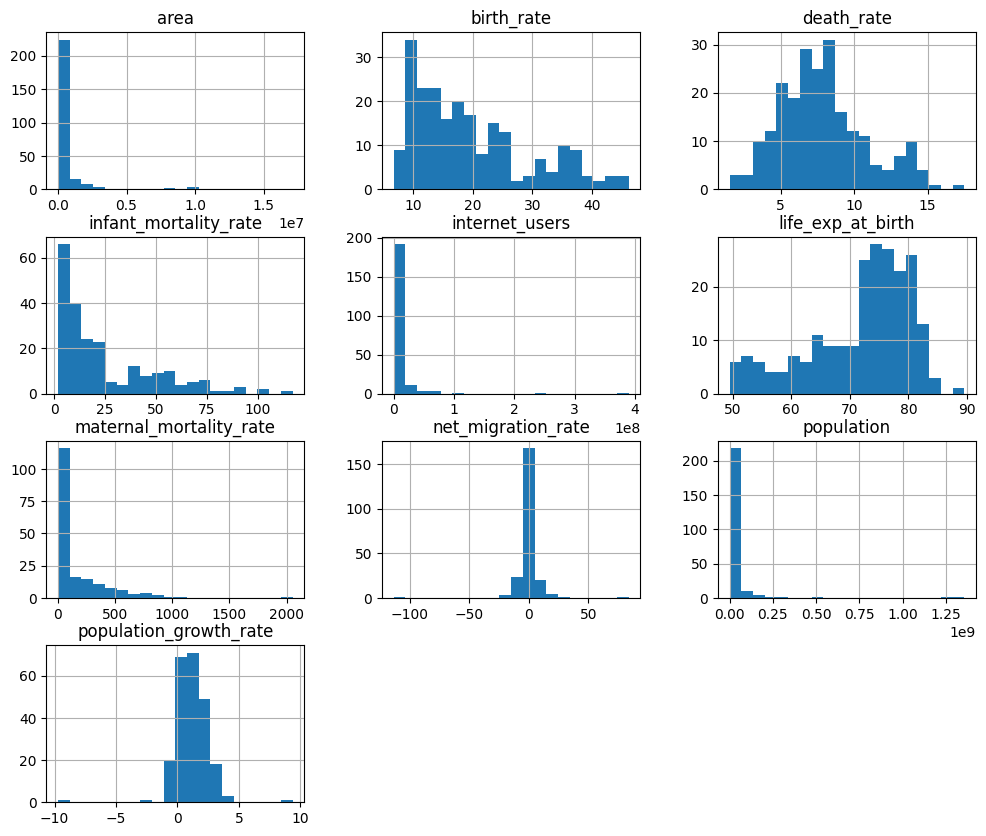


Correlation heatmap of numerical variables:


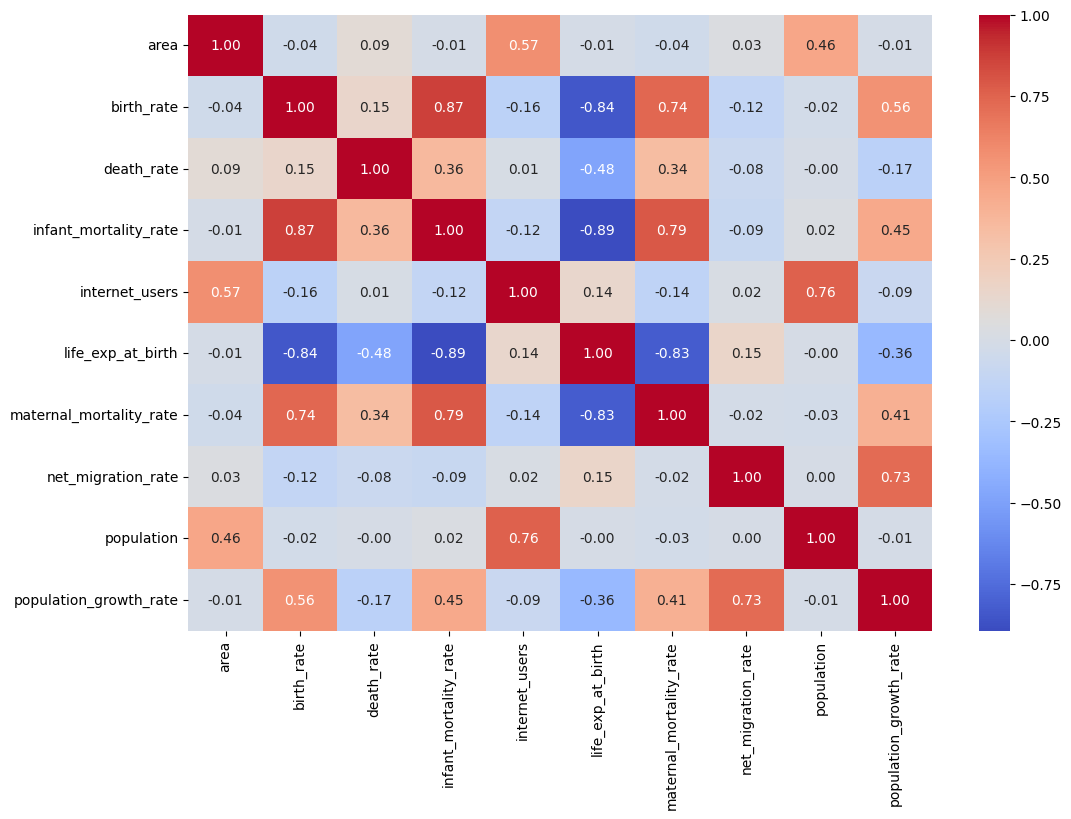


Box plots of numerical variables:


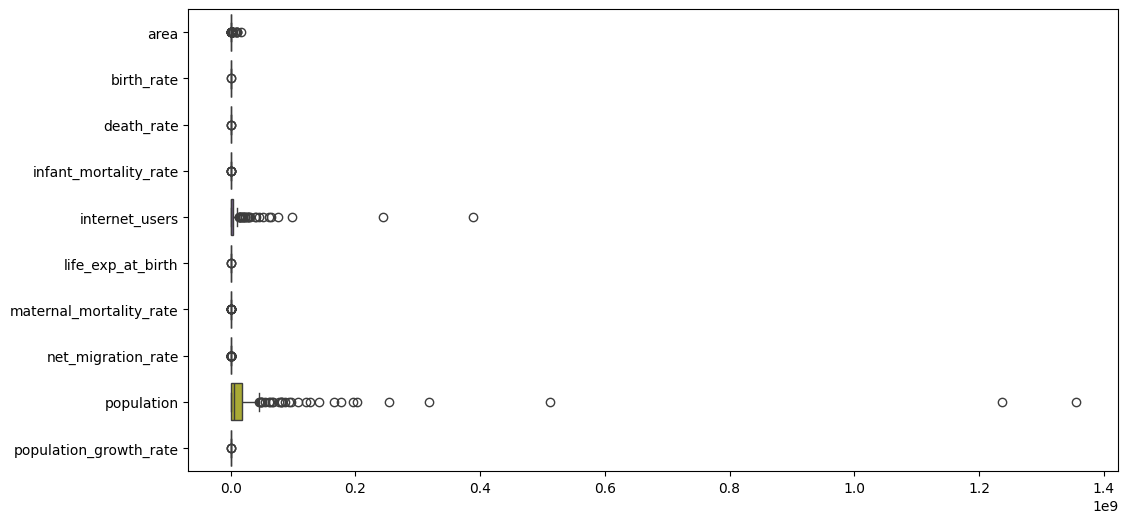


Pairplot of numerical variables:


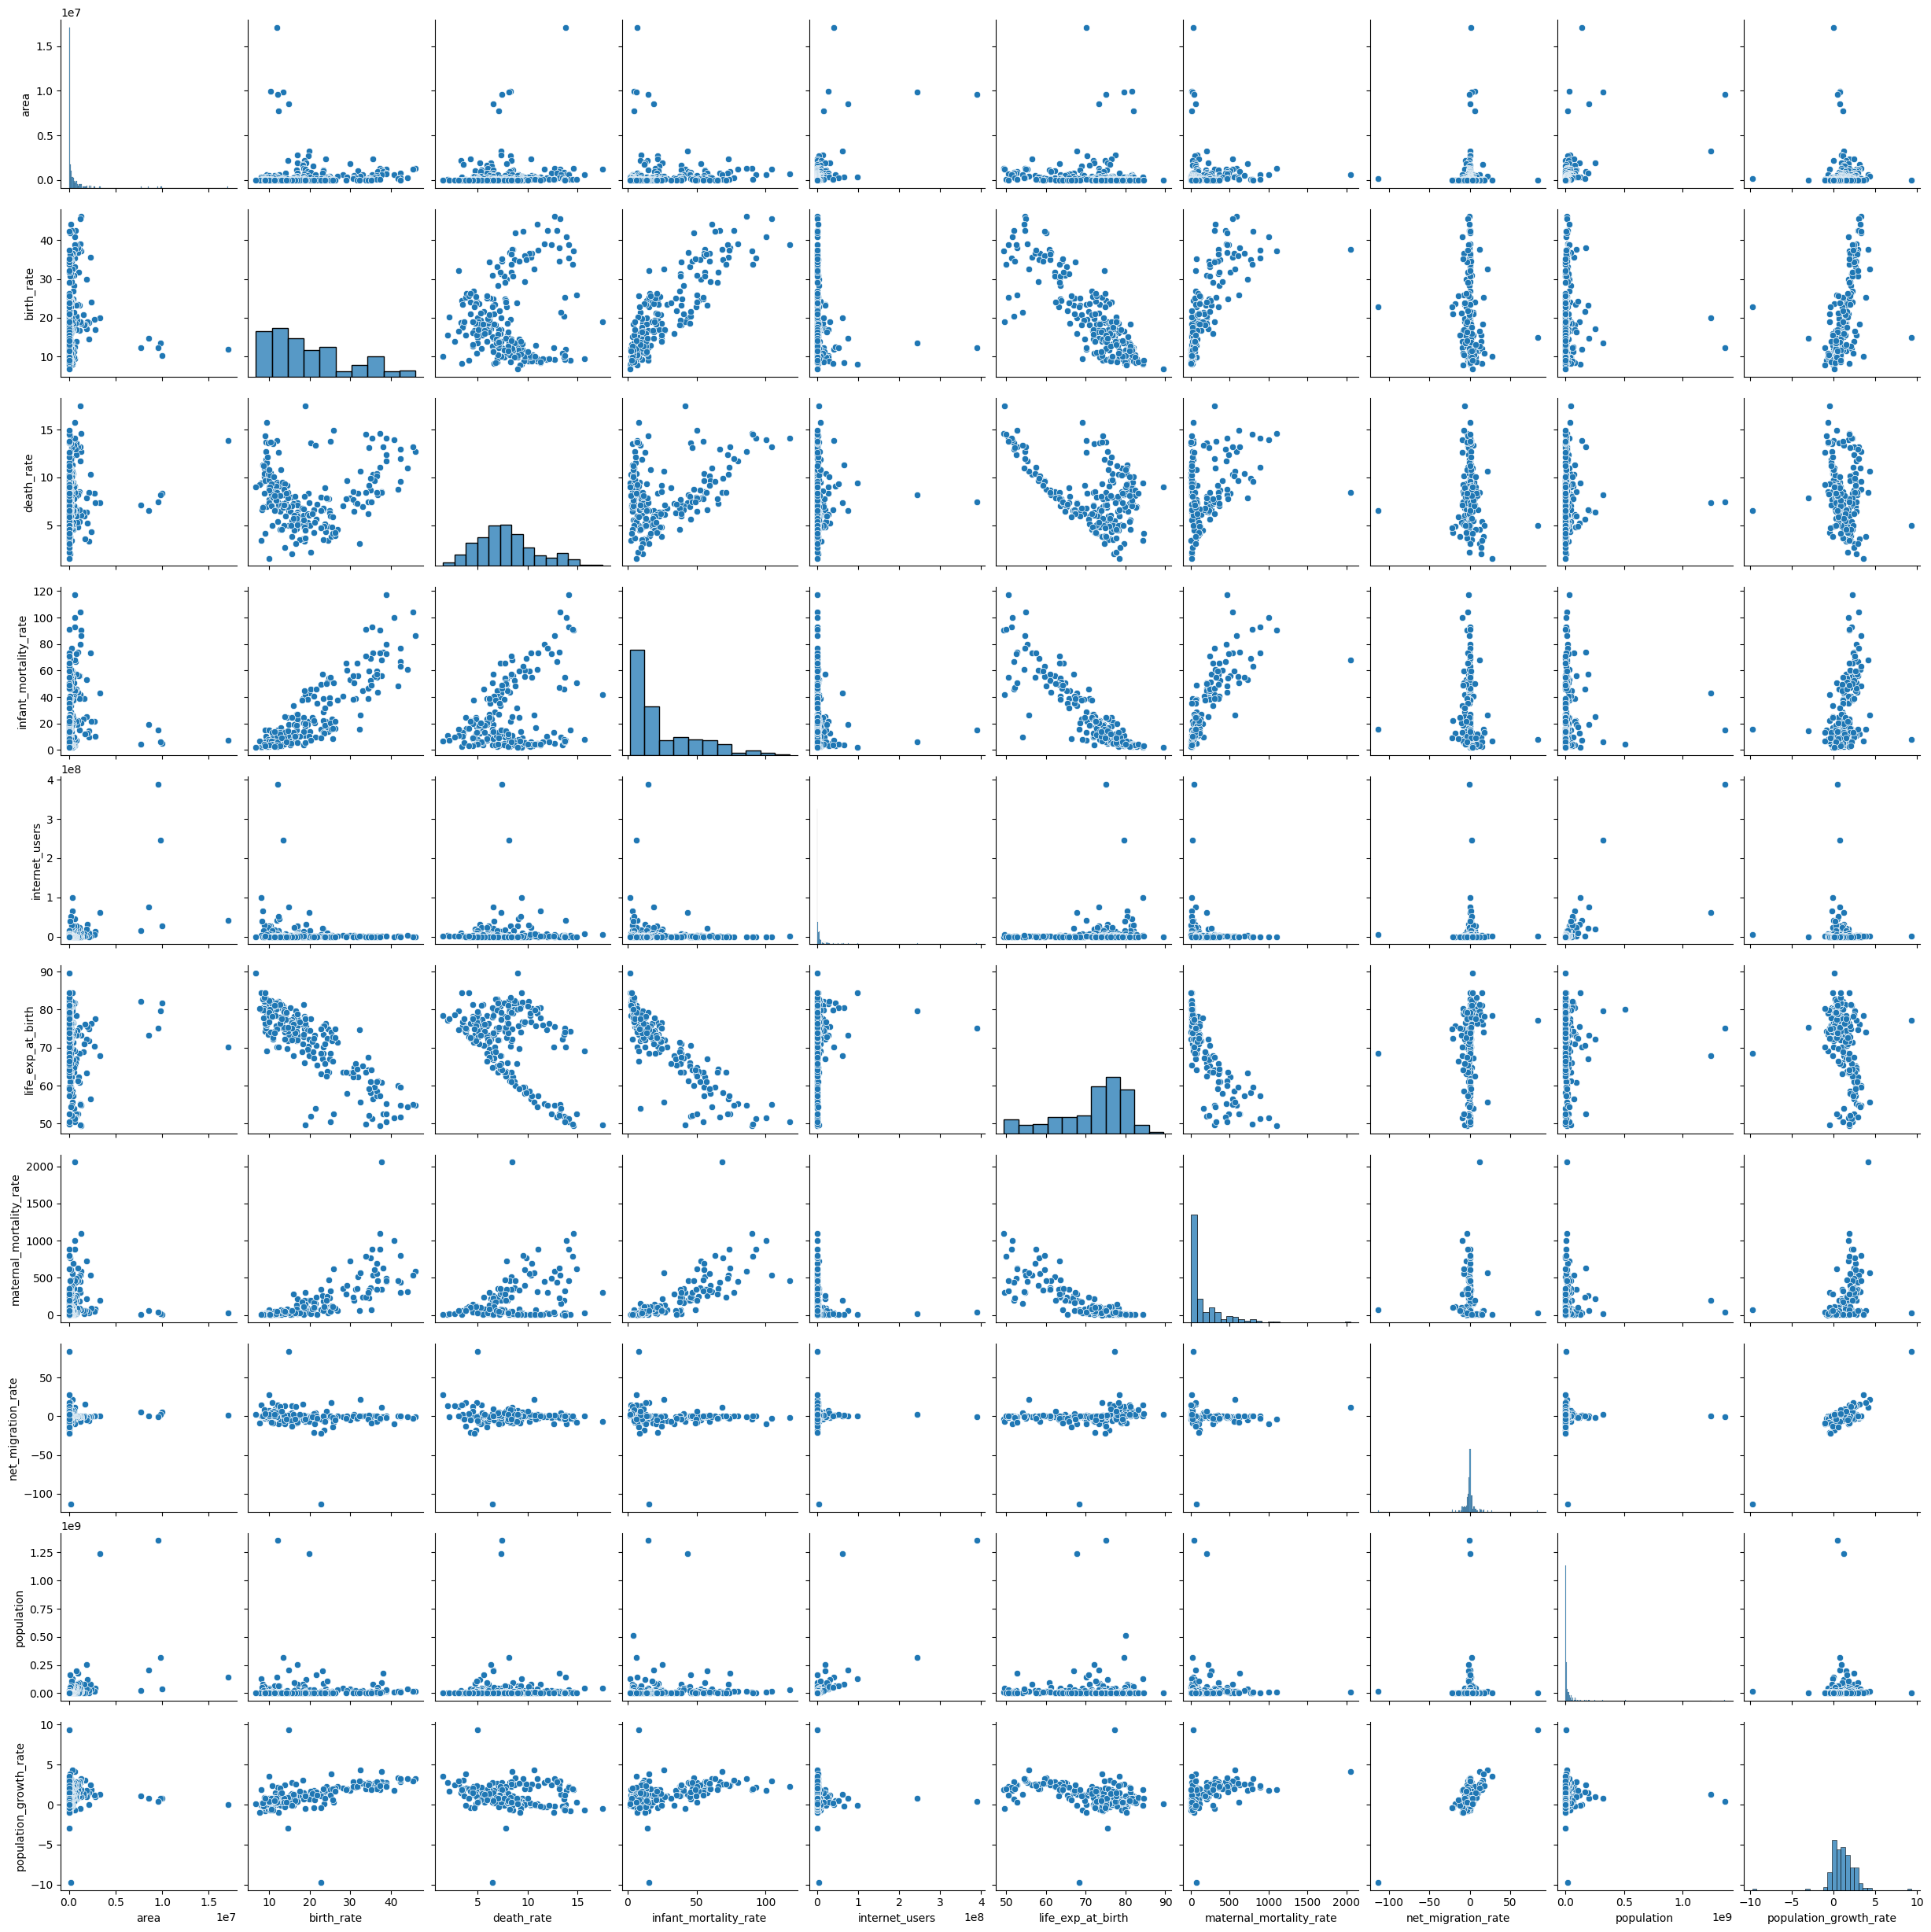

In [19]:
print("\nDistribution of categorical variables:")
for column in df.select_dtypes(include=['object']).columns:
    print("\n", column)
    print(df[column].value_counts())

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms of numerical variables
print("\nHistograms of numerical variables:")
df.hist(bins=20, figsize=(12, 10))
plt.show()

# Select only numerical columns
numerical_columns = df.select_dtypes(include=np.number)

# Correlation heatmap of numerical variables
print("\nCorrelation heatmap of numerical variables:")
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Box plots of numerical variables
print("\nBox plots of numerical variables:")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h')
plt.show()

# Pairplot of numerical variables
print("\nPairplot of numerical variables:")
sns.pairplot(df)
plt.show()


2. Feature Engineering for Missing Data

**TASK: What countries have NaN for Agriculture? What is the main aspect of these countries?**

Using birth_rate in this task as Agriculture is not a column in the dataset provided

In [17]:
nan_birth_rate = df[df['birth_rate'].isna()]
print("NaN Birth Rates:")
nan_birth_rate[['country', 'birth_rate']]

NaN Birth Rates:


,country,birth_rate
124,Svalbard,NaN
163,Falkland Islands (Islas Malvinas),NaN
167,Kosovo,NaN
197,Curacao,NaN
208,Niue,NaN
217,Christmas Island,NaN
223,Saint Martin,NaN
225,Pitcairn Islands,NaN
226,Norfolk Island,NaN
231,Cocos (Keeling) Islands,NaN


In [18]:
# Main Aspects
print("\nMain Aspects: ")
nan_birth_rate.describe(include='all')


Main Aspects: 


,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
count,35,33.000000,0.0,1.0,1.00,4.000000,2.000000,0.0,1.00,1.400000e+01,9.000000
unique,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Svalbard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4413.303030,NaN,8.0,4.33,1316.000000,79.000000,NaN,1.27,3.667805e+07,0.117778
std,NaN,14195.922913,NaN,NaN,NaN,1087.485172,1.442498,NaN,NaN,1.366453e+08,0.372383
min,NaN,0.000000,NaN,8.0,4.33,464.000000,77.980000,NaN,1.27,4.800000e+01,-0.030000
25%,NaN,5.000000,NaN,8.0,4.33,716.000000,78.490000,NaN,1.27,1.226750e+03,-0.010000
50%,NaN,36.000000,NaN,8.0,4.33,950.000000,79.000000,NaN,1.27,2.041000e+03,0.000000
75%,NaN,260.000000,NaN,8.0,4.33,1550.000000,79.510000,NaN,1.27,2.546425e+04,0.010000


**TASK: Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.**

Hints on how to do this: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group


Still using birth_rate in this case

In [ ]:
# Fill missing birth_rate values based on mean birth_rate for each country
df['birth_rate'] = df.groupby('country')['birth_rate'].transform(lambda x: x.fillna(x.mean()))

# Fill remaining NaN values with overall mean birth_rate
mean_birth_rate = df['birth_rate'].mean()
df['birth_rate'].fillna(overall_mean_birth_rate, inplace=True)
df[['country', 'birth_rate']]

In [27]:
# Now checking if birht rate still has NaN values
new_birth_rate = df[df['birth_rate'].isna()]
len(new_birth_rate)

0

TASK:Use the same method for the missing values in Literacy.

In [28]:
# Doing this for infant mortality rate

In [30]:
df['infant_mortality_rate'] = df.groupby('country')['infant_mortality_rate'].transform(lambda x: x.fillna(x.mean()))

mean_birth_rate = df['infant_mortality_rate'].mean()
df['infant_mortality_rate'].fillna(overall_mean_birth_rate, inplace=True)
df[['country', 'infant_mortality_rate']]

,country,infant_mortality_rate
0,Russia,7.080000
1,Canada,4.710000
2,United States,6.170000
3,China,14.790000
4,Brazil,19.210000
...,...,...
254,Bouvet Island,19.659063
255,Palmyra Atoll,19.659063
256,Akrotiri,19.659063
257,European Union,4.330000


In [32]:
# Now checking if infant mortality rate still has NaN values
new_infant_mortality = df[df['infant_mortality_rate'].isna()]
len(new_infant_mortality)

0

3. Data Feature Preparation

TASK: Create a dummy variable to all categorical data.

In [34]:
# Categorical data in this dataset is countries
dummies = pd.get_dummies(df['country'], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.drop('country', axis=1, inplace=True)

df

,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,...,Venezuela,Vietnam,Virgin Islands,Wake Island,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
0,17098242.0,11.870000,13.83,7.080000,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03,...,False,False,False,False,False,False,False,False,False,False
1,9984670.0,10.290000,8.31,4.710000,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76,...,False,False,False,False,False,False,False,False,False,False
2,9826675.0,13.420000,8.15,6.170000,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77,...,False,False,False,False,False,False,False,False,False,False
3,9596960.0,12.170000,7.44,14.790000,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44,...,False,False,False,False,False,False,False,False,False,False
4,8514877.0,14.720000,6.54,19.210000,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,49.0,19.659063,NaN,19.659063,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
255,12.0,19.659063,NaN,19.659063,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
256,123.0,19.659063,NaN,19.659063,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
257,NaN,19.659063,NaN,4.330000,NaN,80.02,NaN,NaN,5.114348e+08,NaN,...,False,False,False,False,False,False,False,False,False,False


TASK: For numerical data perform standard scaler.

In [36]:
from sklearn.preprocessing import StandardScaler

numeric = df.select_dtypes(include=['float64']).columns

scaler = StandardScaler()
df[numeric] = scaler.fit_transform(df[numeric])

df

,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,...,Venezuela,Vietnam,Virgin Islands,Wake Island,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
0,9.782533,-8.681109e-01,1.992068,-0.747783,0.973458,-0.189875,-0.549947,0.168344,0.864581,-0.798862,...,False,False,False,False,False,False,False,False,False,False
1,5.582179,-1.044206e+00,0.135547,-0.853574,0.557854,1.121238,-0.633983,0.525437,0.019936,-0.240790,...,False,False,False,False,False,False,False,False,False,False
2,5.488888,-6.953595e-01,0.081735,-0.788403,7.080433,0.880886,-0.599604,0.236705,2.249012,-0.233725,...,False,False,False,False,False,False,False,False,False,False
3,5.353248,-8.346752e-01,-0.157057,-0.403628,11.388134,0.378540,-0.538488,-0.012451,10.385072,-0.466844,...,False,False,False,False,False,False,False,False,False,False
4,4.714310,-5.504712e-01,-0.459751,-0.206330,2.024327,0.165527,-0.465911,0.002840,1.336881,-0.212533,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,-0.313445,8.230225e-17,NaN,-0.186285,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
255,-0.313467,8.230225e-17,NaN,-0.186285,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
256,-0.313401,8.230225e-17,NaN,-0.186285,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
257,NaN,8.230225e-17,NaN,-0.870536,NaN,0.933285,NaN,NaN,3.759948,NaN,...,False,False,False,False,False,False,False,False,False,False


4. Creating and Fitting Kmeans Model

**TASK:** 

- Plot the within sum of squares vs. the number of cluster and find the optimal number of clusters.
- Fit a k-means model of the optimum cluster.

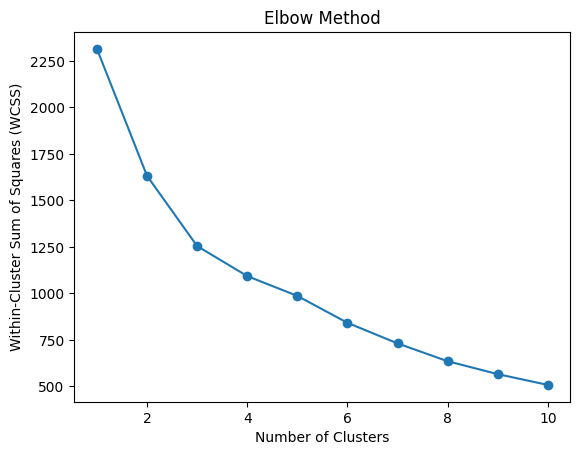

In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

def select_numerical_columns(df):
    return df.select_dtypes(include=['float64'])

def impute_missing_values(X):
    imputer = SimpleImputer(strategy='mean')
    return imputer.fit_transform(X)

def kmeans_elbow_method(X_imputed_df):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
        kmeans.fit(X_imputed_df)
        wcss.append(kmeans.inertia_)
    return wcss

def plot_elbow(wcss):
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.show()


X = select_numerical_columns(df)
X_imputed = impute_missing_values(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)
wcss = kmeans_elbow_method(X_imputed_df)


plot_elbow(wcss)



5. Model Interpretation

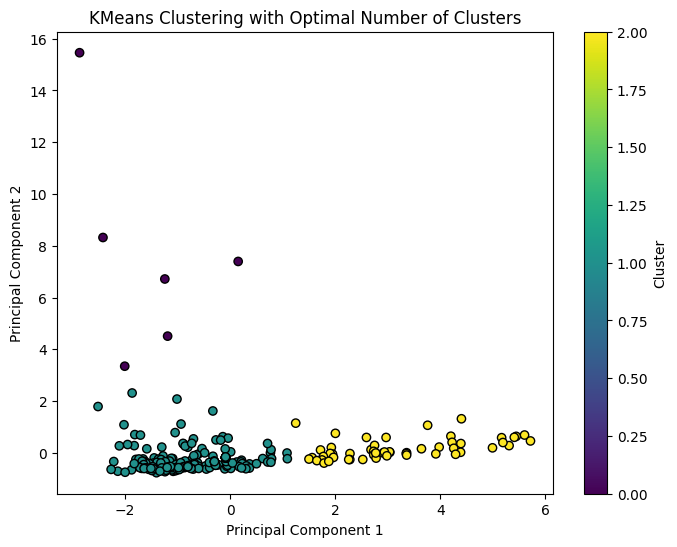

In [53]:
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def perform_pca(X_imputed_df):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_imputed_df)
    return X_pca

def visualize_clusters(X_pca, cluster_labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k')
    plt.title('KMeans Clustering with Optimal Number of Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

optimal_num_clusters = 3 # Based on the elbow graph

# Fit a KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
kmeans.fit(X_imputed_df)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Perform PCA
X_pca = perform_pca(X_imputed_df)

# Visualize the clusters
visualize_clusters(X_pca, cluster_labels)


5. Model Interpretation

TASK: What K value do you think is a good choice? Are there multiple reasonable choices? What features are helping define these cluster choices.

The K-value is picked/chosen based on the "inflection" point based on the elbow graph using the elbow method. K=3 was chosen by me because the rate of the decrease reduced significantly. However, other choices could also be K=4 and K=5. After fitting the K-means model, examining the centroids of each cluster provides insights into feature importance. Features with higher importance scores are likely to be more significant in defining cluster boundaries. 